# Processing Institute Level Data
# Good data in every file

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. MANUALLY ENTER CSV FILENAMES
# --------------------------------------
#files = [
#    "Most-Recent-Cohorts-Institution.csv" # you can change it with the files like: "MERGED2023_24_PP.csv"
#]

#files = [
#    "FieldOfStudyData1415_1516_PP.csv" # you can change it with the files like: "MERGED2023_24_PP.csv"
#]


files = [
    "MERGED2014_15_PP.csv" # you can change it with the files like: "MERGED2023_24_PP.csv"
]



# --------------------------------------
# 2. MERGE ALL FILES
# --------------------------------------
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)

/scratch/local/19271608/ipykernel_4185468/1988767433.py:26: DtypeWarning:

Columns (1537,1540,1542,1575,1589,1606,1610,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.



In [62]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7761,48065701,869423,8694,Rasmussen University - Overland Park,Overland Park,KS,662102786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
7762,48154401,4220901,42209,National Personal Training Institute of Cleveland,Highland Heights,OH,44143,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
7763,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,95113,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
7764,48400201,4228101,42281,High Desert Medical College - Bakerfield,Bakersfield,CA,93301,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [63]:
print(df.columns)

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11', 'MD_EARN_WNE_INC1_P11',
       'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11', 'SCORECARD_SECTOR'],
      dtype='object', length=3306)


In [64]:
col = df["PCIP14"]

In [65]:
col.isna().sum()


731

In [66]:
df.isna().sum().sum()


13933458

# So each row has about 3437071/3306 = 1039 missing entries; Given the number of total columns this seems great!
# Let's drop rows that has NaN entries for engineering columns

In [67]:
# ----------------------------------------
# 1. Drop NaNs ONLY from PCIP14/15
# ----------------------------------------
df = df.dropna(subset=["PCIP14", "PCIP15"]).reset_index(drop=True)

In [68]:
df.isna().sum().sum()


12335295

In [69]:
# Fill other weird PCIP NaNs with 0
pcip_cols = [c for c in df.columns if c.startswith("PCIP")]
# df[pcip_cols] = df[pcip_cols].fillna(0)

# ----------------------------------------
# 2. Create features
# ----------------------------------------

df["PCIP14"] = df["PCIP14"].astype(float)
df["PCIP15"] = df["PCIP15"].astype(float)

df["ENG_TOTAL"] = df["PCIP14"] + df["PCIP15"]
df["ENG_RATIO"] = df["ENG_TOTAL"] / df[pcip_cols].sum(axis=1)
df["ENG_HEAVY"] = (df["ENG_TOTAL"] > 0.20).astype(int)

if "UGDS" in df.columns:
    df["ENG_STRENGTH"] = df["ENG_TOTAL"] * df["UGDS"]
else:
    df["ENG_STRENGTH"] = None

print(df[["PCIP14","PCIP15","ENG_TOTAL","ENG_RATIO","ENG_HEAVY","ENG_STRENGTH"]].head())


   PCIP14  PCIP15  ENG_TOTAL  ENG_RATIO  ENG_HEAVY  ENG_STRENGTH
0  0.1081  0.0339     0.1420   0.142000          0      597.2520
1  0.0577  0.0000     0.0577   0.057712          0      656.7991
2  0.0000  0.0000     0.0000   0.000000          0        0.0000
3  0.2624  0.0000     0.2624   0.262426          1     1430.3424
4  0.0000  0.0000     0.0000   0.000000          0        0.0000


In [70]:
import plotly.express as px

# Make sure you have lat/lon columns
# Scorecard dataset columns: LATITUDE, LONGITUDE

df_map = df.dropna(subset=["LATITUDE", "LONGITUDE"]).copy()

fig = px.scatter_geo(
    df_map,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="ENG_TOTAL",   # color by engineering intensity
    hover_name="INSTNM", # college name
    hover_data={
        "PCIP14": True,
        "PCIP15": True,
        "ENG_TOTAL": True,
        "STATE": df_map["STABBR"]
    },
    scope="usa",
    color_continuous_scale="Viridis",
    title="Engineering Focus of Colleges in the U.S.",
    size_max=15
)

fig.show()

In [71]:
import pandas as pd
import numpy as np

def make_college_features(df):
    df = df.copy()

    # --------------------------------------------------------------
    # 1. Clean essential columns (do NOT drop entire dataset)
    # --------------------------------------------------------------
    # Fill program % fields (PCIP) with 0 (NaN = program not offered)
    pcip_cols = [c for c in df.columns if c.startswith("PCIP")]
    df[pcip_cols] = df[pcip_cols].fillna(0)

    # Drop rows missing core identifiers
    df = df.dropna(subset=["INSTNM", "STABBR", "LATITUDE", "LONGITUDE"], how="any")

    # --------------------------------------------------------------
    # 2. Academic program features (KEY SIGNAL)
    # --------------------------------------------------------------
    df["ENG_TOTAL"] = df["PCIP14"] + df["PCIP15"]
    df["STEM_TOTAL"] = (
        df["PCIP11"] + df["PCIP14"] + df["PCIP15"] +
        df["PCIP26"] + df["PCIP27"] + df["PCIP40"]
    )

    df["ENG_RATIO"] = df["ENG_TOTAL"] / df[pcip_cols].sum(axis=1)
    df["STEM_RATIO"] = df["STEM_TOTAL"] / df[pcip_cols].sum(axis=1)

    df["ENG_HEAVY"] = (df["ENG_TOTAL"] > 0.20).astype(int)
    df["STEM_HEAVY"] = (df["STEM_TOTAL"] > 0.30).astype(int)

    # --------------------------------------------------------------
    # 3. Student body features
    # --------------------------------------------------------------
    if "UGDS" in df.columns:
        df["UGDS"] = df["UGDS"].fillna(0)
    else:
        df["UGDS"] = 0

    # diversity score (entropy-like measure)
    race_cols = [c for c in df.columns if c.startswith("UGDS_") and c not in ["UGDS_MEN", "UGDS_WOMEN"]]
    df[race_cols] = df[race_cols].fillna(0)

    def entropy(row):
        vals = row[row > 0]
        return -(vals * np.log(vals)).sum() if len(vals) else 0

    df["DIVERSITY_SCORE"] = df[race_cols].apply(entropy, axis=1)

    # --------------------------------------------------------------
    # 4. Cost & affordability
    # --------------------------------------------------------------
    for col in ["TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A"]:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = 0

    df["TUITION_GAP"] = df["TUITIONFEE_OUT"] - df["TUITIONFEE_IN"]
    df["AFFORDABILITY_INDEX"] = 1 / (df["COSTT4_A"] + 1)

    # --------------------------------------------------------------
    # 5. Outcomes / quality
    # --------------------------------------------------------------
    for col in ["MD_EARN_WNE_P10", "RET_FT4", "GRAD_RATE", "ADM_RATE"]:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col] = 0

    df["QUALITY_SCORE"] = (
        0.4 * df["GRAD_RATE"] +
        0.3 * df["RET_FT4"] +
        0.3 * (df["MD_EARN_WNE_P10"] / (df["MD_EARN_WNE_P10"].max() + 1))
    )

    # --------------------------------------------------------------
    # 6. Institution type flags
    # --------------------------------------------------------------
    df["IS_PUBLIC"] = (df["CONTROL"] == 1).astype(int)
    df["IS_PRIVATE"] = (df["CONTROL"] == 2).astype(int)
    df["IS_FORPROFIT"] = (df["CONTROL"] == 3).astype(int)

    # --------------------------------------------------------------
    # 7. Selected final feature set
    # --------------------------------------------------------------
    final_cols = [
        "UNITID",
        "INSTNM", "CITY", "STABBR", "LATITUDE", "LONGITUDE",
        # academic
        "PCIP14", "PCIP15", "ENG_TOTAL", "ENG_RATIO",
        "PCIP11", "STEM_TOTAL", "STEM_RATIO",
        "ENG_HEAVY", "STEM_HEAVY",
        # students
        "UGDS", "UGDS_MEN", "UGDS_WOMEN", "DIVERSITY_SCORE",
        # cost
        "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A",
        "TUITION_GAP", "AFFORDABILITY_INDEX",
        # quality
        "MD_EARN_WNE_P10", "RET_FT4", "GRAD_RATE",
        "ADM_RATE", "QUALITY_SCORE",
        # institution type
        "CONTROL", "IS_PUBLIC", "IS_PRIVATE", "IS_FORPROFIT"
    ]

    final_df = df[final_cols].copy()

    return final_df


In [72]:
final_df = make_college_features(df)

In [73]:
final_df

,UNITID,INSTNM,CITY,STABBR,LATITUDE,LONGITUDE,PCIP14,PCIP15,ENG_TOTAL,ENG_RATIO,...,AFFORDABILITY_INDEX,MD_EARN_WNE_P10,RET_FT4,GRAD_RATE,ADM_RATE,QUALITY_SCORE,CONTROL,IS_PUBLIC,IS_PRIVATE,IS_FORPROFIT


In [74]:

final_df.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'LATITUDE', 'LONGITUDE', 'PCIP14',
       'PCIP15', 'ENG_TOTAL', 'ENG_RATIO', 'PCIP11', 'STEM_TOTAL',
       'STEM_RATIO', 'ENG_HEAVY', 'STEM_HEAVY', 'UGDS', 'UGDS_MEN',
       'UGDS_WOMEN', 'DIVERSITY_SCORE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
       'COSTT4_A', 'TUITION_GAP', 'AFFORDABILITY_INDEX', 'MD_EARN_WNE_P10',
       'RET_FT4', 'GRAD_RATE', 'ADM_RATE', 'QUALITY_SCORE', 'CONTROL',
       'IS_PUBLIC', 'IS_PRIVATE', 'IS_FORPROFIT'],
      dtype='object')

# Save df to a file ( We will have different files like these for different years, creating year-specific institute-level datasets. )

In [75]:
final_df.to_csv("Processed-MERGED2014_15_PP.csv", index=False)


# Classifier: “High-Value Engineering Colleges”

In [1]:
# ============================================================
# High-Value Engineering Colleges Classifier (Idea 1)
# Uses: Processed-MERGED2023_24_PP (2).csv
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------
DATA_PATH = "Processed-MERGED2023_24_PP.csv"  # change this if needed

df = pd.read_csv(DATA_PATH)

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())

# ------------------------------------------------------------
# 2. Create the HIGH_VALUE label
#    Definition (you can tweak thresholds later):
#    - ENG_HEAVY == 1   → engineering-intensive institution
#    - COSTT4_A <= median(COSTT4_A) → relatively affordable
#    - OUTCOME_SCORE >= median(OUTCOME_SCORE), where
#         OUTCOME_SCORE = mean(RET_FT4, GRAD_RATE)
# ------------------------------------------------------------

# Compute outcome score as mean of retention + grad rate (where available)
df["OUTCOME_SCORE"] = df[["RET_FT4", "GRAD_RATE"]].mean(axis=1)

# Compute medians (ignoring NaNs)
cost_median = df["COSTT4_A"].median()
outcome_median = df["OUTCOME_SCORE"].median()

print(f"Median COSTT4_A (cost of attendance): {cost_median:.2f}")
print(f"Median OUTCOME_SCORE: {outcome_median:.4f}")

# Define HIGH_VALUE label
df["HIGH_VALUE"] = (
    (df["ENG_HEAVY"] == 1) &
    (df["COSTT4_A"] <= cost_median) &
    (df["OUTCOME_SCORE"] >= outcome_median)
).astype(int)

print("\nLabel distribution (HIGH_VALUE):")
print(df["HIGH_VALUE"].value_counts())

# ------------------------------------------------------------
# 3. Select features for the model
# ------------------------------------------------------------
# You can adjust this list as you like
feature_cols = [
    "ENG_RATIO",
    "STEM_RATIO",
    "ENG_HEAVY",
    "STEM_HEAVY",
    "UGDS",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "DIVERSITY_SCORE",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "COSTT4_A",
    "TUITION_GAP",
    "AFFORDABILITY_INDEX",
    "RET_FT4",
    "GRAD_RATE",
    "ADM_RATE",
    "CONTROL",
    "IS_PUBLIC",
    "IS_PRIVATE",
    "IS_FORPROFIT",
]

# Keep only columns that actually exist in the dataframe
feature_cols = [c for c in feature_cols if c in df.columns]

print("\nUsing feature columns:")
print(feature_cols)

# Drop rows where label is NaN (shouldn't happen, but just in case)
df = df.dropna(subset=["HIGH_VALUE"])

X = df[feature_cols]
y = df["HIGH_VALUE"]

# ------------------------------------------------------------
# 4. Train/test split
# ------------------------------------------------------------
# Stratify to keep the minority class proportion similar in train & test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ------------------------------------------------------------
# 5. Build the pipeline: Imputer + RandomForestClassifier
# ------------------------------------------------------------
model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("clf", RandomForestClassifier(
            n_estimators=300,
            max_depth=None,
            random_state=42,
            class_weight="balanced"   # helps with imbalance (few HIGH_VALUE = 1)
        )),
    ]
)

# ------------------------------------------------------------
# 6. Fit the model
# ------------------------------------------------------------
model.fit(X_train, y_train)

# ------------------------------------------------------------
# 7. Evaluate on test set
# ------------------------------------------------------------
y_pred = model.predict(X_test)

print("\nClassification report (test set):")
print(classification_report(y_test, y_pred, digits=3))

print("Confusion matrix (test set):")
print(confusion_matrix(y_test, y_pred))

# ------------------------------------------------------------
# 8. Feature importances (from the RandomForest)
# ------------------------------------------------------------
# Extract inner RandomForest from the pipeline
rf = model.named_steps["clf"]
imputer = model.named_steps["imputer"]

# After imputation, features are in the same order as feature_cols
importances = rf.feature_importances_

feat_imp = (
    pd.DataFrame({"feature": feature_cols, "importance": importances})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("\nTop feature importances:")
print(feat_imp.head(15))

# Optional: save feature importances to CSV
feat_imp.to_csv("high_value_feature_importances.csv", index=False)
print("\nFeature importances saved to 'high_value_feature_importances.csv'")


Data shape: (5650, 33)
Columns: ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'LATITUDE', 'LONGITUDE', 'PCIP14', 'PCIP15', 'ENG_TOTAL', 'ENG_RATIO', 'PCIP11', 'STEM_TOTAL', 'STEM_RATIO', 'ENG_HEAVY', 'STEM_HEAVY', 'UGDS', 'UGDS_MEN', 'UGDS_WOMEN', 'DIVERSITY_SCORE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A', 'TUITION_GAP', 'AFFORDABILITY_INDEX', 'MD_EARN_WNE_P10', 'RET_FT4', 'GRAD_RATE', 'ADM_RATE', 'QUALITY_SCORE', 'CONTROL', 'IS_PUBLIC', 'IS_PRIVATE', 'IS_FORPROFIT']
Median COSTT4_A (cost of attendance): 24517.00
Median OUTCOME_SCORE: 0.3757

Label distribution (HIGH_VALUE):
HIGH_VALUE
0    5584
1      66
Name: count, dtype: int64

Using feature columns:
['ENG_RATIO', 'STEM_RATIO', 'ENG_HEAVY', 'STEM_HEAVY', 'UGDS', 'UGDS_MEN', 'UGDS_WOMEN', 'DIVERSITY_SCORE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'COSTT4_A', 'TUITION_GAP', 'AFFORDABILITY_INDEX', 'RET_FT4', 'GRAD_RATE', 'ADM_RATE', 'CONTROL', 'IS_PUBLIC', 'IS_PRIVATE', 'IS_FORPROFIT']

Train size: 4520
Test size: 1130

Classification repor

#Predicting College Selectivity (Admission Rate Prediction)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1117
           1       1.00      1.00      1.00        13

    accuracy                           1.00      1130
   macro avg       1.00      1.00      1.00      1130
weighted avg       1.00      1.00      1.00      1130



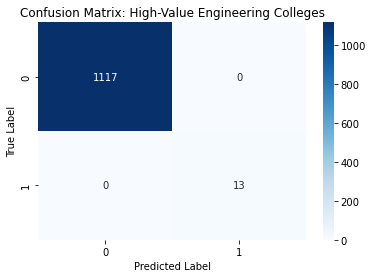

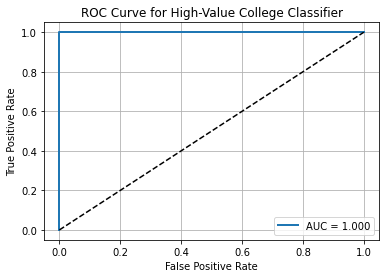

/scratch/local/19529258/ipykernel_3586661/3960838828.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(15), x="importance", y="feature", palette="viridis")


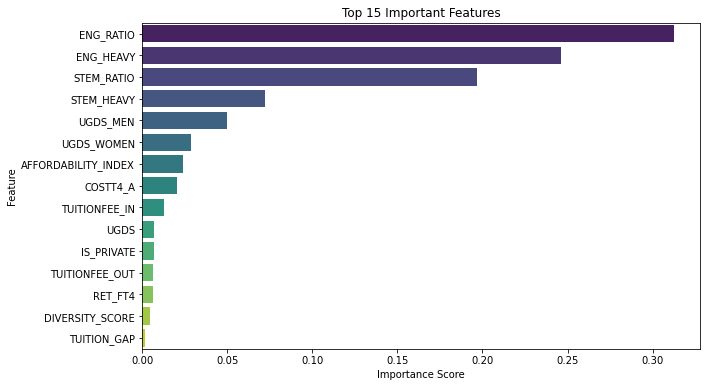

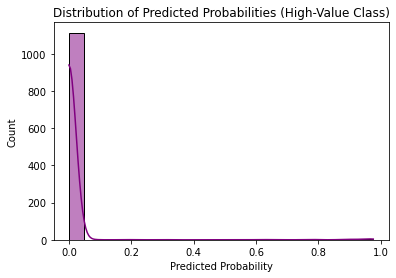


Saved feature importances to high_value_feature_importances.csv


In [3]:
# ============================================================
# High-Value Engineering Colleges Classifier (Idea 1)
# WITH ALL PLOTS (ROC, Confusion Matrix, Feature Importance)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# ------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------
DATA_PATH = "Processed-MERGED2023_24_PP.csv"  # adjust if needed
df = pd.read_csv(DATA_PATH)

# ------------------------------------------------------------
# 2. Create HIGH_VALUE label
# ------------------------------------------------------------

df["OUTCOME_SCORE"] = df[["RET_FT4", "GRAD_RATE"]].mean(axis=1)

cost_median = df["COSTT4_A"].median()
outcome_median = df["OUTCOME_SCORE"].median()

df["HIGH_VALUE"] = (
    (df["ENG_HEAVY"] == 1) &
    (df["COSTT4_A"] <= cost_median) &
    (df["OUTCOME_SCORE"] >= outcome_median)
).astype(int)

# ------------------------------------------------------------
# 3. Select features
# ------------------------------------------------------------
feature_cols = [
    "ENG_RATIO", "STEM_RATIO", "ENG_HEAVY", "STEM_HEAVY",
    "UGDS", "UGDS_MEN", "UGDS_WOMEN", "DIVERSITY_SCORE",
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "TUITION_GAP",
    "AFFORDABILITY_INDEX",
    "RET_FT4", "GRAD_RATE",
    "ADM_RATE",
    "CONTROL", "IS_PUBLIC", "IS_PRIVATE", "IS_FORPROFIT",
]

feature_cols = [c for c in feature_cols if c in df.columns]

df = df.dropna(subset=["HIGH_VALUE"])
X = df[feature_cols]
y = df["HIGH_VALUE"]

# ------------------------------------------------------------
# 4. Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# ------------------------------------------------------------
# 5. Model: RandomForest with Imputation
# ------------------------------------------------------------
model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("clf", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced"
        ))
    ]
)

# ------------------------------------------------------------
# 6. Fit model
# ------------------------------------------------------------
model.fit(X_train, y_train)

# ------------------------------------------------------------
# 7. Predictions
# ------------------------------------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------
# 8. Confusion Matrix Heatmap
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: High-Value Engineering Colleges")
plt.show()

# ------------------------------------------------------------
# 9. ROC Curve
# ------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for High-Value College Classifier")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 10. Feature Importance Plot
# ------------------------------------------------------------
rf = model.named_steps["clf"]
importances = rf.feature_importances_

feat_imp = (
    pd.DataFrame({"feature": feature_cols, "importance": importances})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(15), x="importance", y="feature", palette="viridis")
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ------------------------------------------------------------
# 11. Probability Distribution Plot (Optional)
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=20, kde=True, color="purple")
plt.title("Distribution of Predicted Probabilities (High-Value Class)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()

# Save importances
feat_imp.to_csv("high_value_feature_importances.csv", index=False)
print("\nSaved feature importances to high_value_feature_importances.csv")


# Predicting College Selectivity/Admission Rate Prediction

Data Loaded. Shape: (5650, 33)
After cleaning ADM_RATE: (5650, 33)

Selectivity label counts:
SELECTIVITY_CLASS
0    4951
1     577
2     122
Name: count, dtype: int64

==================== REGRESSION RESULTS ====================
R² Score: 0.35250912034298365
RMSE: 0.1094884070149849


/scratch/local/19529258/ipykernel_3586661/1511686813.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_reg.head(15), x="importance", y="feature", palette="coolwarm")


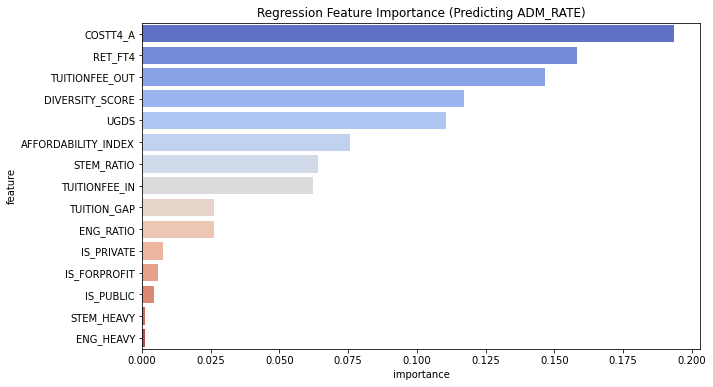


==================== CLASSIFICATION RESULTS ====================
              precision    recall  f1-score   support

           0      0.908     0.987     0.946       990
           1      0.514     0.155     0.238       116
           2      0.684     0.542     0.605        24

    accuracy                          0.892      1130
   macro avg      0.702     0.561     0.596      1130
weighted avg      0.863     0.892     0.866      1130



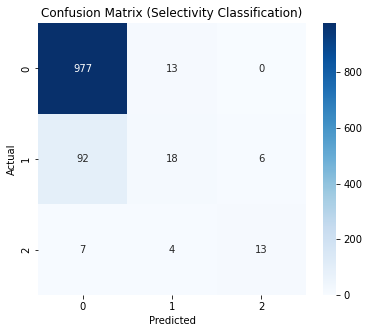

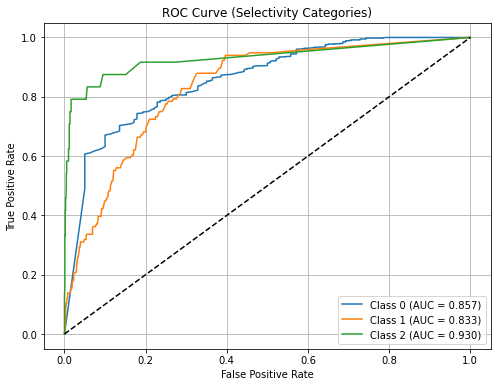

/scratch/local/19529258/ipykernel_3586661/1511686813.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_clf.head(15), x="importance", y="feature", palette="viridis")


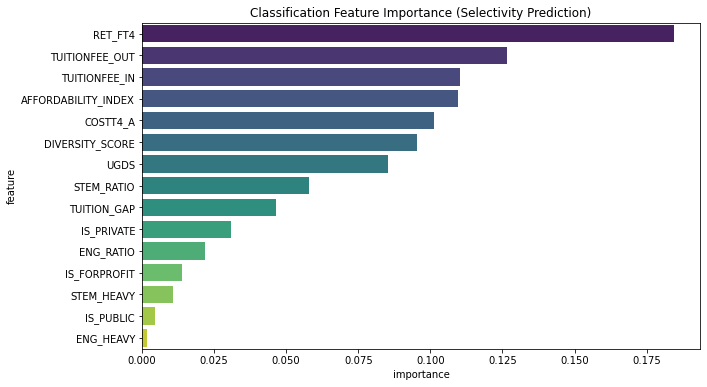


Script completed ✓


In [4]:
# ===============================================================
# IDEA 3 – Predicting College Selectivity (Regression + Classification)
# Using Processed-MERGED2023_24_PP (2).csv
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# ---------------------------------------------------------------
# 1. LOAD THE DATA
# ---------------------------------------------------------------
DATA_PATH = "Processed-MERGED2023_24_PP.csv"

df = pd.read_csv(DATA_PATH)

print("Data Loaded. Shape:", df.shape)

# ---------------------------------------------------------------
# 2. CLEAN TARGET VARIABLE (ADM_RATE)
# ---------------------------------------------------------------
# Remove rows with missing admission rate
df = df[df["ADM_RATE"].notna()]
df = df[(df["ADM_RATE"] >= 0) & (df["ADM_RATE"] <= 1)]

print("After cleaning ADM_RATE:", df.shape)

# ---------------------------------------------------------------
# 3. CREATE SELECTIVITY CATEGORIES
# ---------------------------------------------------------------
# Highly selective: ADM_RATE < 0.3
# Moderately selective: 0.3–0.7
# Less selective: ADM_RATE > 0.7

def classify_selectivity(x):
    if x < 0.3:
        return 2  # Highly selective
    elif x < 0.7:
        return 1  # Moderate
    else:
        return 0  # Less selective

df["SELECTIVITY_CLASS"] = df["ADM_RATE"].apply(classify_selectivity)

print("\nSelectivity label counts:")
print(df["SELECTIVITY_CLASS"].value_counts())

# ---------------------------------------------------------------
# 4. FEATURE SET
# ---------------------------------------------------------------
feature_cols = [
    "TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "AFFORDABILITY_INDEX",
    "TUITION_GAP", "UGDS", "DIVERSITY_SCORE",
    "ENG_RATIO", "STEM_RATIO", "ENG_HEAVY", "STEM_HEAVY",
    "RET_FT4", "GRAD_RATE",
    "IS_PUBLIC", "IS_PRIVATE", "IS_FORPROFIT"
]

feature_cols = [c for c in feature_cols if c in df.columns]

X = df[feature_cols]
y_reg = df["ADM_RATE"]
y_clf = df["SELECTIVITY_CLASS"]

# ---------------------------------------------------------------
# 5. TRAIN / TEST SPLIT
# ---------------------------------------------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, stratify=y_clf, random_state=42
)

# ---------------------------------------------------------------
# 6. REGRESSION MODEL (Predict ADM_RATE)
# ---------------------------------------------------------------
reg_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("rf", RandomForestRegressor(n_estimators=400, random_state=42))
])

reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)

print("\n==================== REGRESSION RESULTS ====================")
print("R² Score:", r2_score(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))

# ---------------------------------------------------------------
# Regression Feature Importance
# ---------------------------------------------------------------
rf_reg = reg_model.named_steps["rf"]
importances_reg = rf_reg.feature_importances_

feat_imp_reg = (
    pd.DataFrame({"feature": feature_cols, "importance": importances_reg})
      .sort_values("importance", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_reg.head(15), x="importance", y="feature", palette="coolwarm")
plt.title("Regression Feature Importance (Predicting ADM_RATE)")
plt.show()

# ---------------------------------------------------------------
# 7. CLASSIFICATION MODEL (Predict Selectivity Category)
# ---------------------------------------------------------------
class_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=400, class_weight="balanced", random_state=42
    ))
])

class_model.fit(X_train_c, y_train_c)

y_pred_c = class_model.predict(X_test_c)
y_prob_c = class_model.predict_proba(X_test_c)

print("\n==================== CLASSIFICATION RESULTS ====================")
print(classification_report(y_test_c, y_pred_c, digits=3))

cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Selectivity Classification)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------------------
# 8. ROC CURVE (for multi-class → one-vs-rest)
# ---------------------------------------------------------------
plt.figure(figsize=(8, 6))

for cls in class_model.named_steps["rf"].classes_:
    fpr, tpr, _ = roc_curve((y_test_c == cls).astype(int), y_prob_c[:, cls])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Selectivity Categories)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 9. CLASSIFICATION FEATURE IMPORTANCE
# ---------------------------------------------------------------
rf_clf = class_model.named_steps["rf"]
importances_clf = rf_clf.feature_importances_

feat_imp_clf = (
    pd.DataFrame({"feature": feature_cols, "importance": importances_clf})
      .sort_values("importance", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_clf.head(15), x="importance", y="feature", palette="viridis")
plt.title("Classification Feature Importance (Selectivity Prediction)")
plt.show()

print("\nScript completed ✓")
